# Carga de datasets optimizados

In [1]:
import pandas as pd
import json

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'

In [2]:
# Cargar los datasets
test_df = pd.read_parquet(test_data_path)
train_df = pd.read_parquet(train_data_path)

In [3]:
# Verificar que los datos se han cargado correctamente
print("Test DataFrame:")
print(test_df.info())
print(test_df.head())

print("\nTrain DataFrame:")
print(train_df.info())
print(train_df.head())

Test DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   session_id       29275 non-null  int32         
 1   date             29275 non-null  datetime64[ns]
 2   timestamp_local  29275 non-null  datetime64[ns]
 3   user_id          29275 non-null  int32         
 4   country          29275 non-null  int8          
 5   partnumber       29275 non-null  int32         
 6   device_type      29275 non-null  int8          
 7   pagetype         29275 non-null  int8          
dtypes: datetime64[ns](2), int32(3), int8(3)
memory usage: 886.4 KB
None
   session_id       date         timestamp_local  user_id  country  \
0         746 2024-06-15 2024-06-15 18:36:47.390       -1       57   
1         746 2024-06-15 2024-06-15 18:37:04.052       -1       57   
2         746 2024-06-15 2024-06-15 18:37:48.159       -1      

# Analisis de distribución

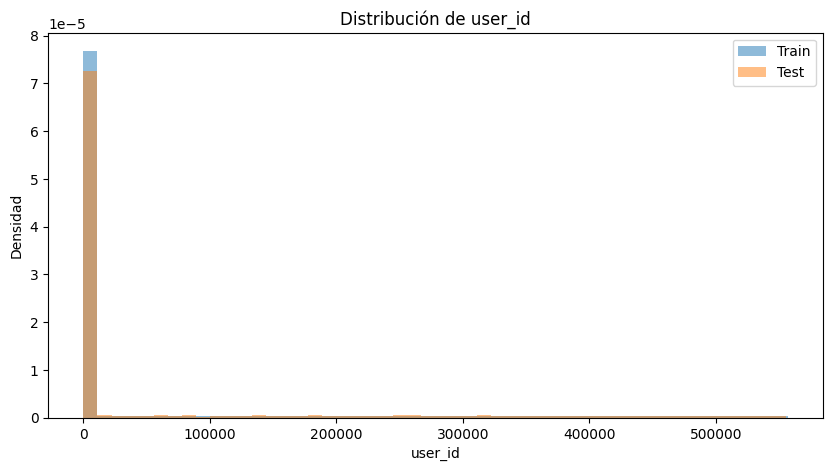

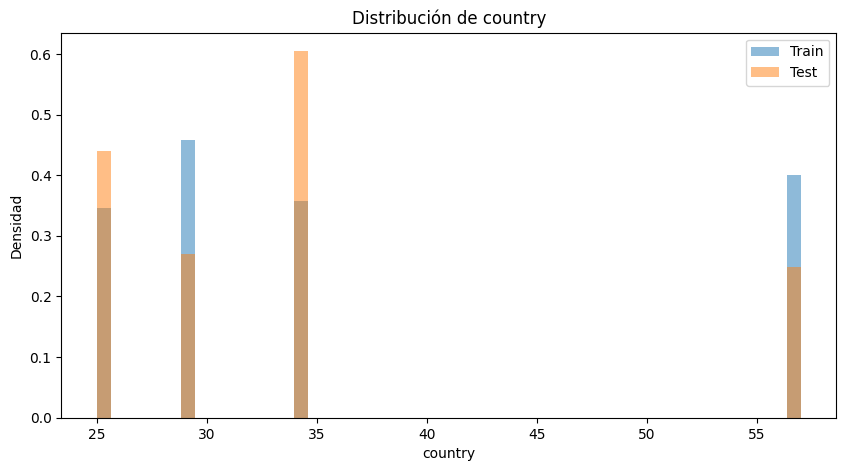

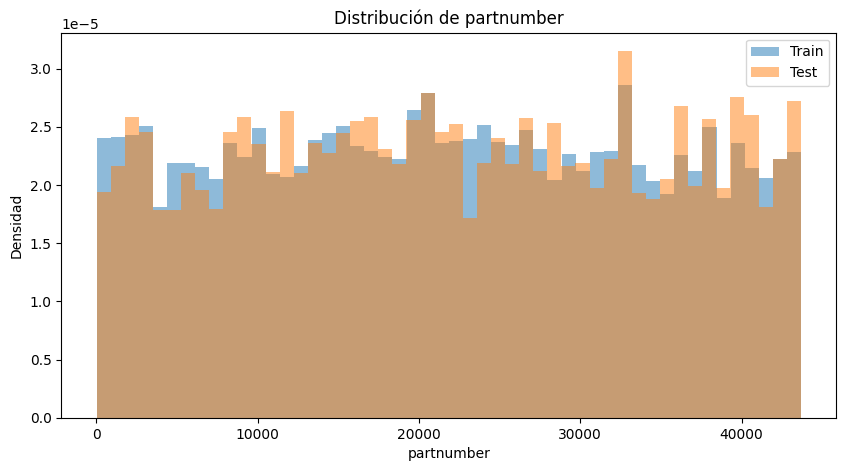

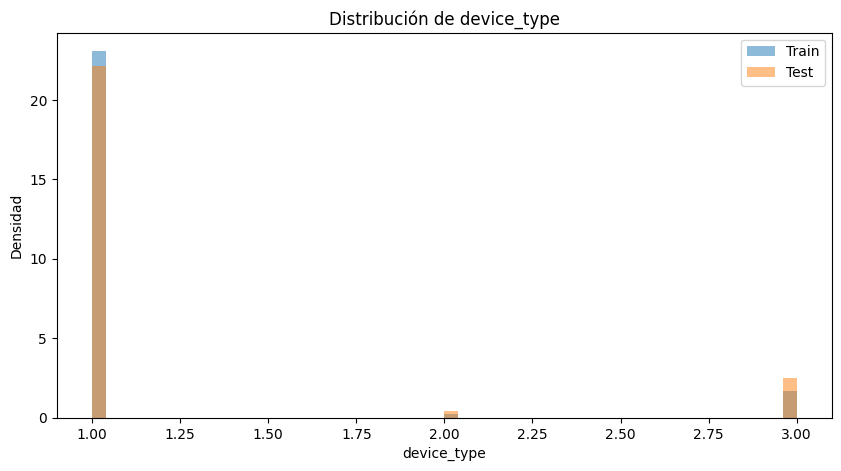

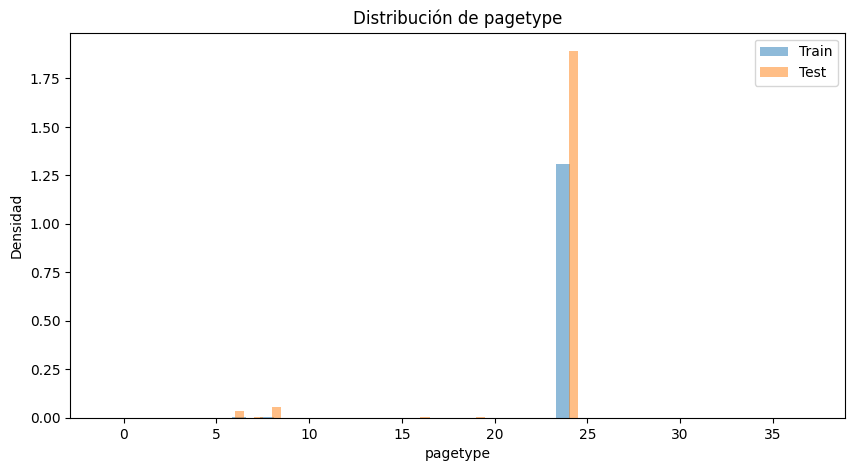

        Column    Train Mean     Test Mean      Train Std       Test Std  \
0      user_id  41031.329712  52420.586268  116480.238465  126904.770441   
1      country     36.442752     34.260495      12.452435      10.539929   
2   partnumber  21714.786610  22085.171238   12486.796948   12502.857230   
3  device_type      1.144113      1.213185       0.508028       0.603799   
4     pagetype     23.900817     23.137865       1.280213       3.671977   

   Train Min  Test Min  Train Max  Test Max  
0       -1.0      -1.0   557006.0  555819.0  
1       25.0      25.0       57.0      57.0  
2        1.0       3.0    43692.0   43679.0  
3        1.0       1.0        3.0       3.0  
4       -1.0       1.0       37.0      26.0  


In [4]:
import matplotlib.pyplot as plt

# Comparar distribuciones
def compare_distributions(train_col, test_col, column_name):
    plt.figure(figsize=(10, 5))
    plt.hist(train_col, bins=50, alpha=0.5, label='Train', density=True)
    plt.hist(test_col, bins=50, alpha=0.5, label='Test', density=True)
    plt.title(f'Distribución de {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()

# Análisis numérico
def numeric_summary(train_df, test_df, columns):
    summary = []
    for col in columns:
        train_stats = train_df[col].describe()
        test_stats = test_df[col].describe()
        summary.append({
            'Column': col,
            'Train Mean': train_stats['mean'],
            'Test Mean': test_stats['mean'],
            'Train Std': train_stats['std'],
            'Test Std': test_stats['std'],
            'Train Min': train_stats['min'],
            'Test Min': test_stats['min'],
            'Train Max': train_stats['max'],
            'Test Max': test_stats['max']
        })
    return pd.DataFrame(summary)

# Columnas a comparar
numeric_columns = ['user_id', 'country', 'partnumber', 'device_type', 'pagetype']

# 1. Comparar distribuciones
for col in numeric_columns:
    compare_distributions(train_df[col], test_df[col], col)

# 2. Resumen numérico
summary_df = numeric_summary(train_df, test_df, numeric_columns)
print(summary_df)


### **1. Análisis de las columnas**

#### **a. `user_id`**
- **Gráfica**: 
  - Gran parte de los valores son `-1`, lo que representa usuarios no logueados, tanto en `train` como en `test`.
  - La densidad de los valores logueados es bastante similar entre ambos datasets, lo que es una buena señal de consistencia.
- **Resumen**:
  - La media en `test` (52,420) es ligeramente mayor que en `train` (41,031), pero los valores extremos (`min = -1`, `max = ~555k`) son consistentes.
- **Conclusión**:
  - La distribución es coherente, pero los usuarios logueados son más frecuentes proporcionalmente en `test`.


#### **b. `country`**
- **Gráfica**:
  - Hay diferencias notables en las distribuciones entre `train` y `test`:
    - En `test`, la mayoría de los países están más concentrados en ciertos valores (`34` y `25`).
    - En `train`, los países tienen una distribución más uniforme.
- **Resumen**:
  - La media en `test` (34.26) es menor que en `train` (36.44), reflejando la mayor concentración en valores más bajos.
  - Los valores mínimos y máximos son consistentes (`25` a `57`).
- **Conclusión**:
  - Hay un cambio en la distribución de países entre `train` y `test`, lo que podría impactar la capacidad del modelo para generalizar.


#### **c. `partnumber`**
- **Gráfica**:
  - Las distribuciones son muy similares entre `train` y `test`, lo que es una señal positiva.
- **Resumen**:
  - La media y la desviación estándar son prácticamente idénticas entre ambos datasets.
  - Los valores extremos (`min`, `max`) también coinciden.
- **Conclusión**:
  - Esta columna está bien alineada entre `train` y `test`.


#### **d. `device_type`**
- **Gráfica**:
  - En ambos datasets, la mayor parte de los valores se concentra en `1`, con una proporción menor en `3`.
  - `test` parece tener una densidad ligeramente mayor en `3` que `train`.
- **Resumen**:
  - La media en `test` (1.213) es ligeramente mayor que en `train` (1.144), reflejando un aumento relativo de dispositivos tipo `3`.
- **Conclusión**:
  - La distribución es consistente, aunque `test` tiene una proporción ligeramente mayor de dispositivos `3`.


#### **e. `pagetype`**
- **Gráfica**:
  - En ambos datasets, los valores están dominados por `24`.
  - `test` tiene una mayor dispersión hacia valores más bajos y más altos en comparación con `train`.
- **Resumen**:
  - La media en `test` (23.13) es menor que en `train` (23.90), y la desviación estándar en `test` (3.67) es mayor.
  - Los valores máximos son diferentes: `37` en `train` y `26` en `test`.
- **Conclusión**:
  - `test` tiene una mayor diversidad en `pagetype`, lo que podría necesitar una normalización o un tratamiento especial.


### **2. Conclusiones generales**
1. **Consistencias**:
   - Las columnas `user_id` y `partnumber` tienen distribuciones consistentes entre `train` y `test`.

2. **Inconsistencias**:
   - **`country`**: La distribución está más concentrada en ciertos valores en `test`.
   - **`pagetype`**: Mayor dispersión y un rango más corto en `test`.

3. **Impacto en el modelado**:
   - Las diferencias en `country` y `pagetype` podrían afectar la capacidad del modelo para generalizar si no se tratan adecuadamente.


---

# Profundizando en el análisis

## Correlación entre variables (solo para train)

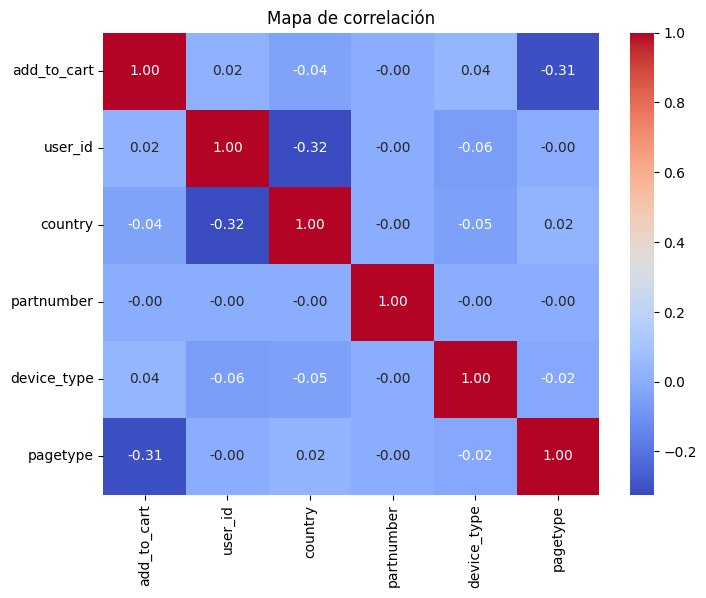

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de columnas numéricas
numeric_columns = ['add_to_cart', 'user_id', 'country', 'partnumber', 'device_type', 'pagetype']
corr_matrix = train_df[numeric_columns].corr()

# Mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de correlación")
plt.show()


## Análisis temporal

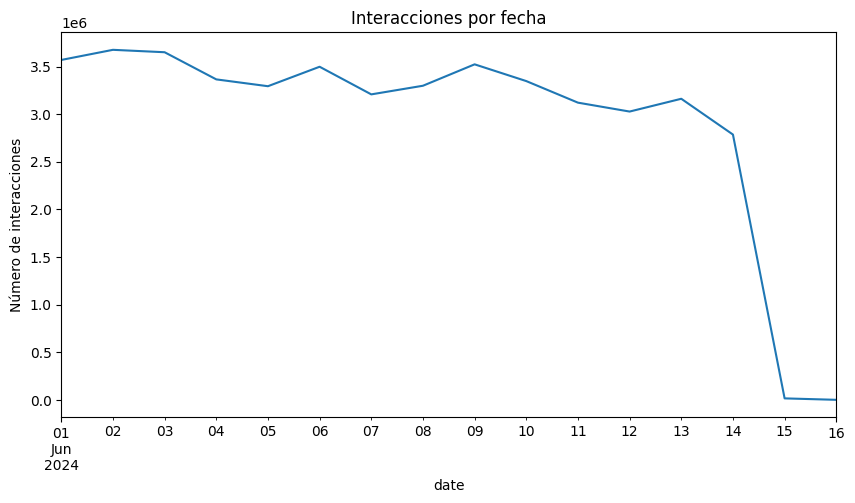

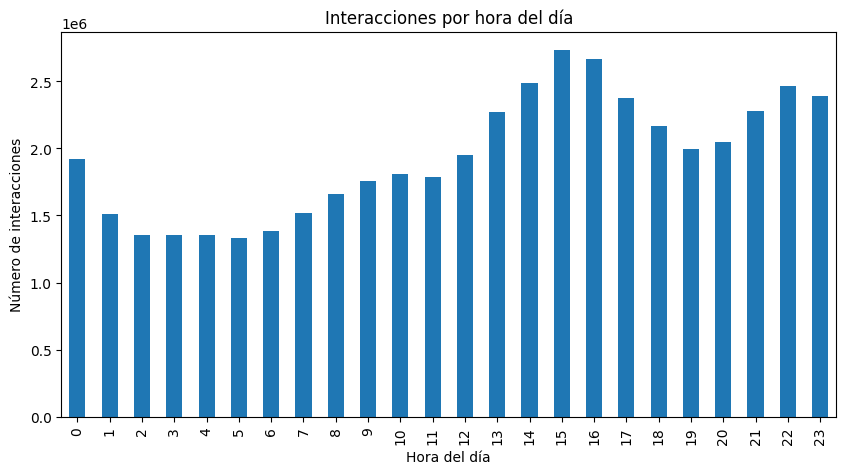

In [6]:
# Interacciones por fecha
train_df['date'].value_counts().sort_index().plot(
    kind='line', figsize=(10, 5), title='Interacciones por fecha')
plt.ylabel("Número de interacciones")
plt.show()

# Interacciones por hora (agregado por hora del día)
train_df['hour'] = train_df['timestamp_local'].dt.hour
train_df.groupby('hour').size().plot(
    kind='bar', figsize=(10, 5), title='Interacciones por hora del día')
plt.ylabel("Número de interacciones")
plt.xlabel("Hora del día")
plt.show()


## Distribución y unicidad de session_id

In [7]:
# Comprobar unicidad de session_id
print("Sesiones únicas:", train_df['session_id'].nunique())
print("Registros totales:", len(train_df))

# Longitud promedio de las sesiones
session_lengths = train_df.groupby('session_id').size()
session_lengths.describe()


Sesiones únicas: 4573756
Registros totales: 46551445


count    4.573756e+06
mean     1.017795e+01
std      2.526358e+01
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      7.481000e+03
dtype: float64

## Análisis de clases desbalanceadas (add_to_cart)

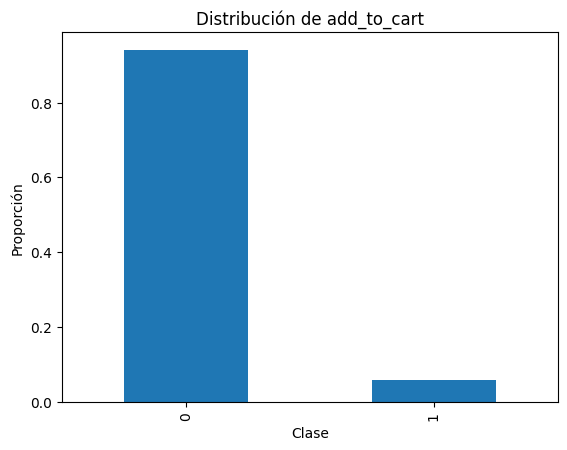

In [8]:
# Distribución de add_to_cart
train_df['add_to_cart'].value_counts(normalize=True).plot(
    kind='bar', title='Distribución de add_to_cart')
plt.ylabel("Proporción")
plt.xlabel("Clase")
plt.show()


## Análisis de usuarios no logueados (user_id == -1)

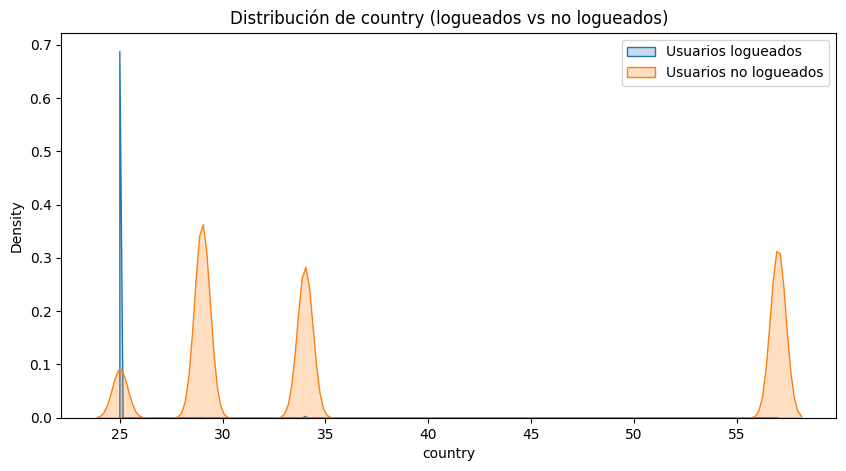

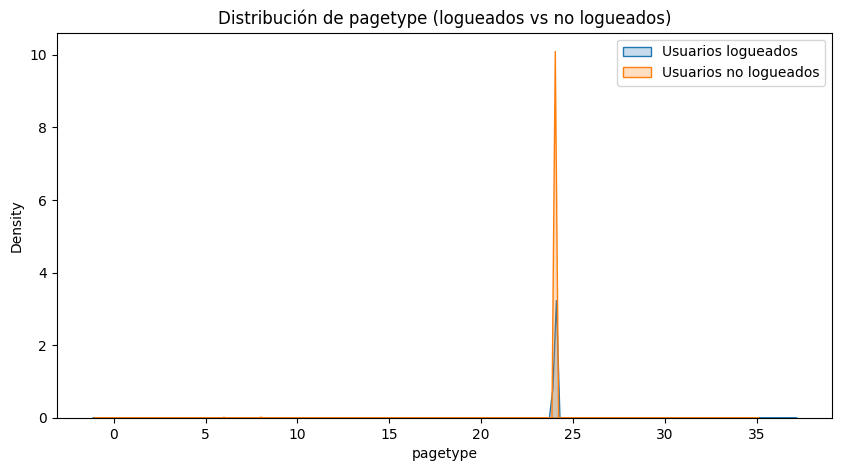

In [9]:
logged_in = train_df[train_df['user_id'] != -1]
not_logged_in = train_df[train_df['user_id'] == -1]

# Comparar distribuciones
def compare_logged_in_distributions(col):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(logged_in[col], label='Usuarios logueados', fill=True)
    sns.kdeplot(not_logged_in[col], label='Usuarios no logueados', fill=True)
    plt.title(f"Distribución de {col} (logueados vs no logueados)")
    plt.legend()
    plt.show()

compare_logged_in_distributions('country')
compare_logged_in_distributions('pagetype')


## Valores únicos en categorías (country, device_type, pagetype)

In [10]:
# Comparar valores únicos
for col in ['country', 'device_type', 'pagetype']:
    train_unique = set(train_df[col].unique())
    test_unique = set(test_df[col].unique())
    diff = test_unique - train_unique
    print(f"Valores en test que no están en train para {col}: {diff}")


Valores en test que no están en train para country: set()
Valores en test que no están en train para device_type: set()
Valores en test que no están en train para pagetype: set()


## Resumen

### **1. Mapa de correlación**
- **Análisis**:
  - La correlación de `add_to_cart` con otras variables es baja, lo que indica que ninguna de ellas tiene una relación lineal fuerte con el objetivo.
  - La correlación más alta (en valor absoluto) es con `pagetype` (-0.31), lo que sugiere que ciertos tipos de página pueden influir en las interacciones.
  - `user_id` y `country` tienen una correlación negativa moderada (-0.32), indicando que algunos países pueden estar asociados con usuarios no logueados.

- **Conclusión**:
  - La baja correlación no descarta la posibilidad de relaciones no lineales. Transformaciones o modelos más complejos (e.g., árboles de decisión, redes neuronales) podrían capturar interacciones más sutiles.


### **2. Interacciones por fecha**
- **Análisis**:
  - Las interacciones disminuyen gradualmente a lo largo del período observado, con una caída abrupta hacia el final.
  - Esto podría deberse a cambios en la actividad de los usuarios o a una reducción en la recopilación de datos.

- **Conclusión**:
  - Es importante normalizar o ajustar por la tendencia temporal, especialmente si el modelo se usará en períodos futuros.
  - Podría ser útil agregar una característica temporal como "días desde el inicio" para capturar la posición relativa en el tiempo.


### **3. Interacciones por hora del día**
- **Análisis**:
  - Hay un claro patrón de interacción:
    - **Picos**: Entre las 14:00 y las 16:00 horas.
    - **Valles**: Durante la madrugada (2:00 a 6:00 horas).
  - Esto podría reflejar el comportamiento típico de los usuarios según su rutina diaria.

- **Conclusión**:
  - Crear una característica que indique la hora del día (o si es horario pico) podría ser valioso para el modelo.


### **4. Distribución de `add_to_cart`**
- **Análisis**:
  - El dataset está desbalanceado, con una proporción muy alta de `0` (no agregado al carrito) frente a `1`.
  - Esto podría dificultar la capacidad del modelo para predecir correctamente la clase minoritaria.

- **Conclusión**:
  - Es necesario manejar el desbalance con estrategias como:
    - Sobremuestreo de la clase minoritaria (e.g., SMOTE).
    - Submuestreo de la clase mayoritaria.
    - Uso de métricas específicas como **F1-score** o **AUC-PR** para evaluar el modelo.

---

### **5. Distribución de `country` y `pagetype` (logueados vs no logueados)**
- **Análisis**:
  - **`country`**:
    - Los usuarios logueados tienen una distribución más concentrada en un único país.
    - Los usuarios no logueados están dispersos en varios países.
  - **`pagetype`**:
    - Hay una pequeña diferencia en la distribución entre usuarios logueados y no logueados, pero ambos tienen una fuerte concentración en ciertos tipos de página (e.g., `24`).

- **Conclusión**:
  - Estas diferencias podrían ser útiles para el modelo. Considera crear una característica indicando si un usuario está logueado o no y cómo esto interactúa con otras variables.


### **6. Valores únicos**
- **Resultados**:
  - No hay valores únicos en `test` que no estén presentes en `train` para las columnas `country`, `device_type` y `pagetype`.
  - Esto asegura que no habrá problemas de encoding al aplicar el modelo a `test`.


### **7. Estadísticas generales de las sesiones**
- **Análisis**:
  - La longitud de las sesiones (interacciones por `session_id`) tiene un promedio bajo, con un rango amplio (1 a 7,481 interacciones).
  - La mayoría de las sesiones son cortas, pero hay algunas muy largas que podrían ser outliers.

- **Conclusión**:
  - Podría ser útil agregar una característica que indique la longitud de la sesión para capturar estas diferencias.
  - Considera tratar outliers si afectan al modelo.



---

# Comparaciones Train vs Test

## Comparación temporal (date, timestamp_local)

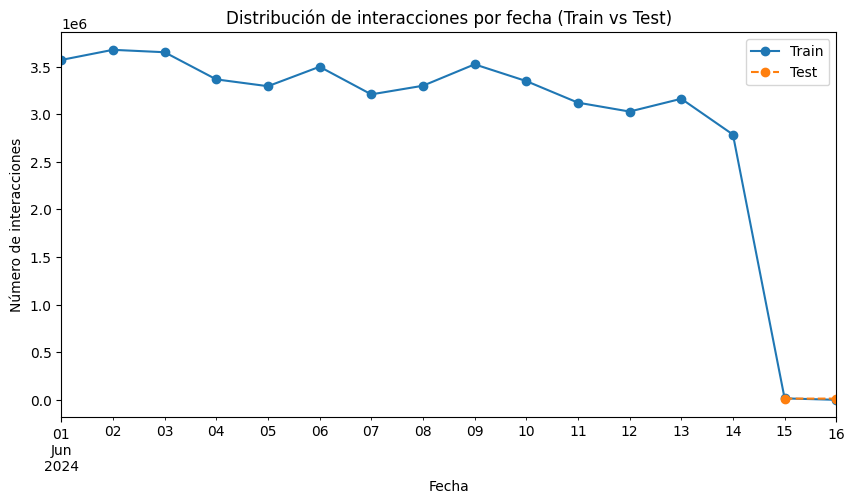

In [11]:
# Comparar distribuciones de fechas entre train y test
train_dates = train_df['date'].value_counts().sort_index()
test_dates = test_df['date'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
train_dates.plot(kind='line', label='Train', marker='o')
test_dates.plot(kind='line', label='Test', marker='o', linestyle='--')
plt.title("Distribución de interacciones por fecha (Train vs Test)")
plt.xlabel("Fecha")
plt.ylabel("Número de interacciones")
plt.legend()
plt.show()


## Longitud de las sesiones (session_id)

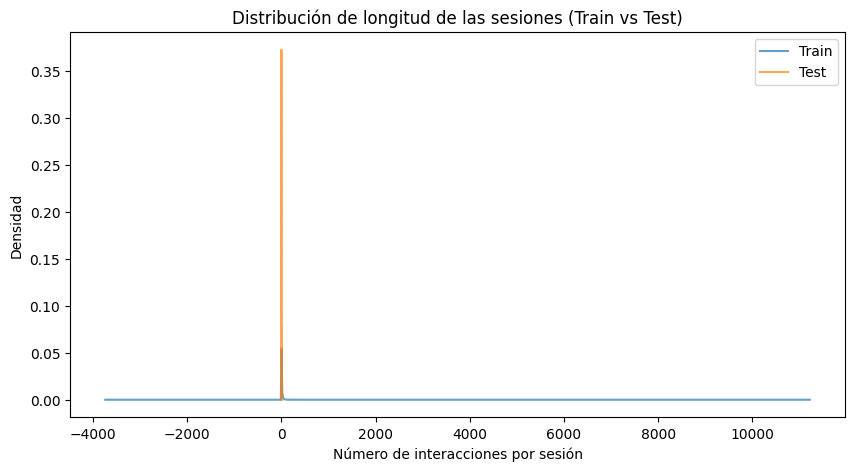

In [12]:
# Longitud de las sesiones
train_session_lengths = train_df.groupby('session_id').size()
test_session_lengths = test_df.groupby('session_id').size()

plt.figure(figsize=(10, 5))
train_session_lengths.plot(kind='kde', label='Train', alpha=0.7)
test_session_lengths.plot(kind='kde', label='Test', alpha=0.7)
plt.title("Distribución de longitud de las sesiones (Train vs Test)")
plt.xlabel("Número de interacciones por sesión")
plt.ylabel("Densidad")
plt.legend()
plt.show()


## Evaluación de outliers

In [13]:
# Detectar sesiones extremadamente largas
outlier_threshold = train_session_lengths.quantile(0.99)
long_sessions = train_session_lengths[train_session_lengths > outlier_threshold]
print(f"Sesiones extremadamente largas en train: {len(long_sessions)}")

# Distribución de valores extremos en pagetype
train_outliers_pagetype = train_df[train_df['pagetype'] > train_df['pagetype'].quantile(0.99)]
print(f"Valores extremos en pagetype en train: {train_outliers_pagetype['pagetype'].unique()}")


Sesiones extremadamente largas en train: 45455
Valores extremos en pagetype en train: [25 29 26 36 35 33 34 27 37 30 31 32 28]


## Distribución condicional por user_id

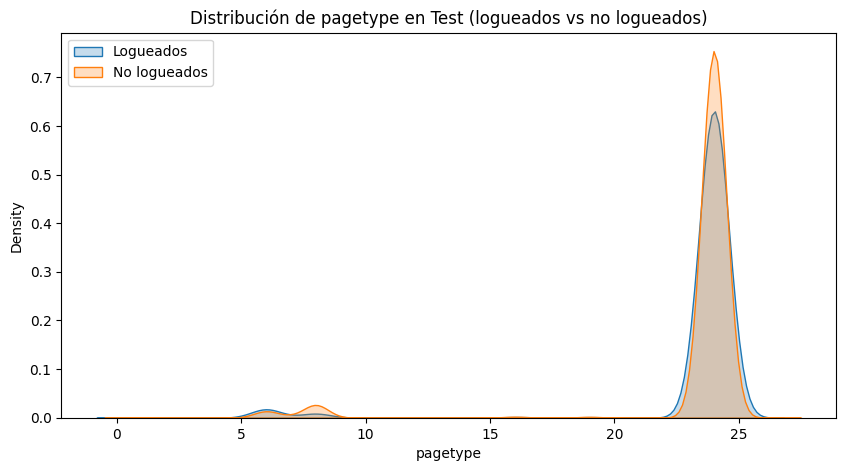

In [15]:
# Distribución condicional de pagetype por tipo de usuario
logged_in_test = test_df[test_df['user_id'] != -1]
not_logged_in_test = test_df[test_df['user_id'] == -1]

plt.figure(figsize=(10, 5))
sns.kdeplot(logged_in_test['pagetype'], label='Logueados', fill=True)
sns.kdeplot(not_logged_in_test['pagetype'], label='No logueados', fill=True)
plt.title("Distribución de pagetype en Test (logueados vs no logueados)")
plt.legend()
plt.show()


## Evaluación de patrones por país (country)

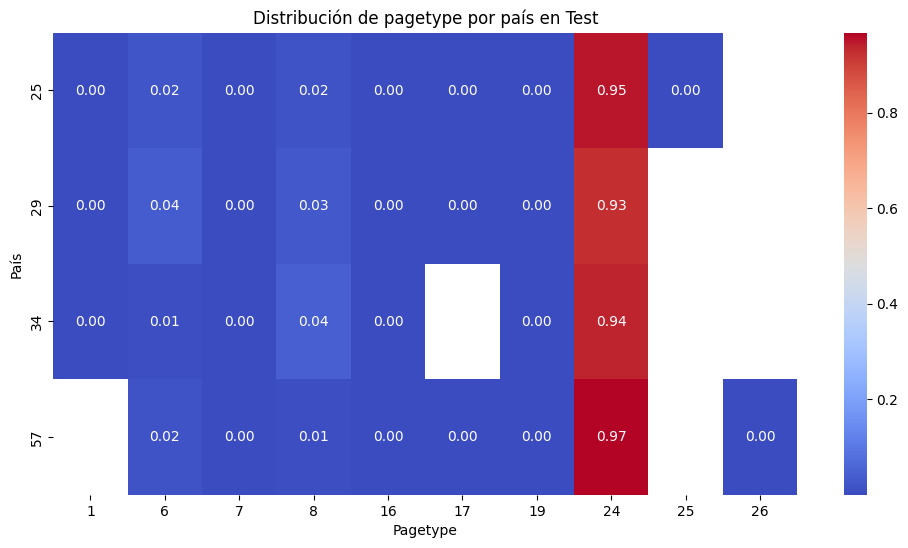

In [16]:
# Distribución de pagetype por país en test
country_pagetype = test_df.groupby('country')['pagetype'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(country_pagetype, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Distribución de pagetype por país en Test")
plt.ylabel("País")
plt.xlabel("Pagetype")
plt.show()


## Relación entre variables categóricas

In [17]:
# Matriz cruzada entre country y pagetype
cross_tab_train = pd.crosstab(train_df['country'], train_df['pagetype'])
cross_tab_test = pd.crosstab(test_df['country'], test_df['pagetype'])

print("Matriz cruzada Train:")
print(cross_tab_train)
print("\nMatriz cruzada Test:")
print(cross_tab_test)


Matriz cruzada Train:
pagetype  -1     1    2    3    4    5      6     7      8    9   ...   28  \
country                                                           ...        
25        853  1191    0   79    0   68  32750  1199  24780    6  ...    0   
29        137   515    5   71    1   51  43829  1338  29547    7  ...    0   
34        207  1697    0   13    0   30  20979  4591  68013    9  ...    1   
57          0   249    0   29    0   16  15933   831   7300    6  ...    0   

pagetype   29   30   31   32   33   34   35   36   37  
country                                                
25          0    1    0    1    0    2    0    1    1  
29          0    0    2    0    1    0    0    0    0  
34          1    0    0    0    0    0    0    0    0  
57          0    0    0    0    0    0    1    0    0  

[4 rows x 38 columns]

Matriz cruzada Test:
pagetype  1    6   7    8   16  17  19     24  25  26
country                                              
25         1  180  1

## Resumen

### **Distribución de interacciones por fecha**
- **Observaciones:**
  - El `train` tiene una distribución amplia de interacciones en múltiples días, mientras que el `test` está concentrado mayormente en las fechas finales (15 y 16 de junio).
  - Esto implica que los datos de `test` corresponden a un período reducido, por lo que el modelo necesita ser robusto ante patrones temporales específicos de esos días.

- **Recomendación:**
  - Introducir características temporales adicionales, como el día de la semana (`weekday`) o si es fin de semana/laborable, para capturar patrones específicos del comportamiento de los usuarios en estas fechas.


### **Distribución de longitud de las sesiones**
- **Observaciones:**
  - En `train`, las sesiones tienen una distribución más amplia, con algunas sesiones extremadamente largas (outliers), mientras que en `test` las sesiones parecen ser mucho más cortas.
  - Esto sugiere que el `test` está compuesto por usuarios que realizaron menos interacciones por sesión.

- **Recomendación:**
  - Tratar los outliers en las sesiones de `train`. Por ejemplo, puedes recortar las sesiones extremadamente largas (e.g., mayor al percentil 99).
  - Incluir la longitud de la sesión como una característica en el modelo, ya que puede correlacionarse con la probabilidad de añadir productos al carrito.


### **Distribución de `pagetype` (logueados vs no logueados)**
- **Observaciones:**
  - Los usuarios no logueados (línea naranja) tienen una distribución muy similar a los logueados, aunque su densidad es ligeramente mayor en algunos valores de `pagetype`.
  - Esto indica que los patrones de comportamiento no varían drásticamente entre logueados y no logueados.

- **Recomendación:**
  - Mantener esta segmentación (`logueados vs no logueados`) como una característica separada, ya que podría influir en el modelo si hay ligeras diferencias en los valores de `pagetype`.


### **Distribución de `pagetype` por país**
- **Observaciones:**
  - Hay claras diferencias en la distribución de `pagetype` según el país.
  - Por ejemplo, en el país 57, casi todas las interacciones están concentradas en el tipo 24 (`pagetype` dominante), mientras que en el país 34 hay algo más de variedad.
  - Algunos valores de `pagetype` como 25 y 26 son raros y prácticamente no aparecen en `train`.

- **Recomendación:**
  - Crear combinaciones de características (e.g., `country_pagetype`) para capturar estos patrones específicos por país.
  - Considerar tratar valores raros de `pagetype` en `test` como categorías adicionales o agruparlos con otros valores similares.


### **Sesiones extremadamente largas**
- **Observaciones:**
  - Hay 45,455 sesiones en `train` consideradas extremadamente largas (outliers).
  - Este comportamiento no se refleja en `test`, donde las sesiones son más cortas y consistentes.

- **Recomendación:**
  - Podrías eliminar estas sesiones del `train` si no representan comportamientos comunes o si generan ruido en el modelo.

---

### **Matriz cruzada de `country` y `pagetype`**
- **Observaciones:**
  - En `test`, los países 25, 29, y 34 tienen una distribución más uniforme entre `pagetype`, mientras que en el país 57, el tipo 24 domina.
  - Los valores extremos de `pagetype` (e.g., 25, 26, 36, 37) están ausentes en la mayoría de los países en `test`.

- **Recomendación:**
  - Verificar la relevancia de estas combinaciones raras en `train` y su impacto en el modelo.
  - Si los valores de `pagetype` extremos no tienen suficiente representación, podrías agruparlos bajo una categoría "otros".
